In [2]:
import cv2

# 1.&nbsp;Lectura y Escritura de una imagen

In [20]:
I = cv2.imread('osin.jpeg')
print("Tamaño de la imagen BGR: ", I.shape)

Tamaño de la imagen BGR:  (183, 275, 3)


## 1.1. Mostrar usando imshow

In [21]:
# Si se utiliza colab
colab = False
if (colab):
    cv2_imshow(I)

# Si no se utiliza colab
else:
    # Argumentos de imshow: (Nombre de la ventana, imagen)
    cv2.imshow('image', I)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()

Se puede leer también una imagen como si estuviese en escala de grises, añadiendo la opción "cv2.IMREAD_GRAYSCALE" (que es equivalente a colocar 0)

In [22]:
Igray = cv2.imread('osin.jpeg', cv2.IMREAD_GRAYSCALE)
print("Tamaño de la imagen en gris: ", Igray.shape)

Tamaño de la imagen en gris:  (183, 275)


In [23]:
if (colab):
    cv2_imshow(Igray)
else:
    cv2.imshow('image gray', Igray)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()

## 1.2. Mostrar usando matplotlib

In [11]:
from matplotlib import pyplot as plt

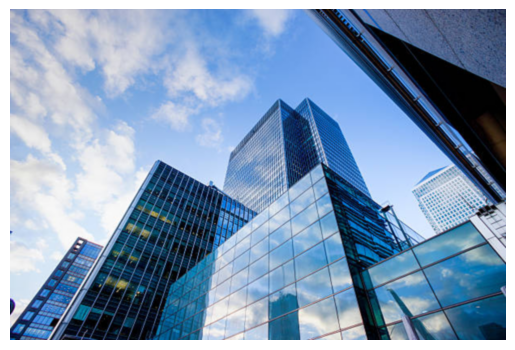

In [12]:
I = cv2.imread('edificio.jpg')

# Convertir de BGR (defecto de opencv) en RGB
Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(Irgb, interpolation='bicubic')
# Eliminar las escalas en los ejes
plt.axis('off')    # También se puede utilizar: plt.xticks([]), plt.yticks([])
plt.show()

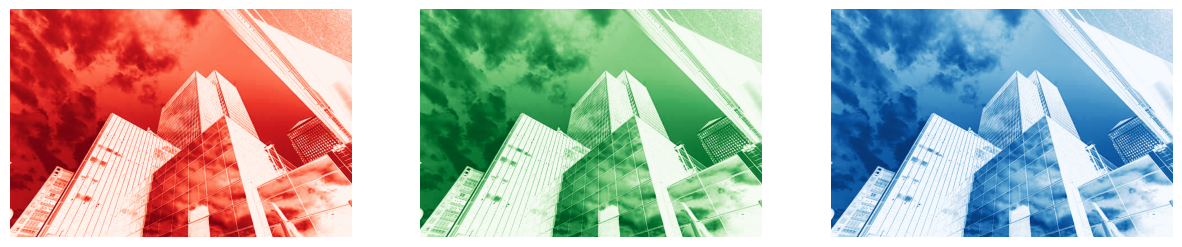

In [13]:
# Separar componentes R G B
Ir = Irgb[:,:,0]; Ig = Irgb[:,:,1]; Ib = Irgb[:,:,2]

# Mostrar imágenes RGB separadas
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(Ir, cmap='Reds'); plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(Ir, cmap='Greens'); plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(Ir, cmap='Blues'); plt.axis('off');

## 1.3. Escritura de la imagen

In [14]:
cv2.imwrite('catgray.png', Igray)

True

# 2.&nbsp;Uso de Cámara

El siguiente ejemplo solo funcionará en local ya que requiere acceso a la cámara, y desde Google Colab no es directo el acceder a la cámara local.

In [15]:
# Para grabar un video, cambiar esta variable a: True
generar_video = True

# Instancia que capturará el video
cam = cv2.VideoCapture(0)

In [16]:
if (generar_video):
    # Define el codec y crea el objeto VideoWriter que almacenará el video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

In [17]:
# Variable para almacenar el tamaño de la imagen
Isize = None
# Mientras la cámara esté "abierta"
print("\nIMPORTANTE: Para detener la cámara presionar \"q\"")
while(cam.isOpened()):
    # Leer la imagen de la cámara:
    #       retval=1 si hay una imagen válida
    #       frame es la imagen (en caso que retval sea 1)
    retval, frame = cam.read()

    # Solo si se tiene una imagen válida
    if retval==True:
        # Mostrar el tamaño de la imagen solo 1 vez
        if (Isize==None):
            Isize = frame.shape
            print("Tamaño de la imagen: ", Isize)
        # Voltear horizontalmente (opcional)
        # frame = cv2.flip(frame, 1)
        # Si se desea grabar el video, se almacena en "out"
        if (generar_video):
            out.write(frame)
        # Mostrar la imagen de la cámara
        cv2.imshow('Mi camara', frame)
        # Esperar 30ms entre imágenes
        # Si se presiona 'q' se termina el bucle
        if (cv2.waitKey(30) & 0xFF) == ord('q'):
            break
    else:
        break

# Cuando termine de usarse la cámara, eliminar los recursos
cam.release()
cv2.destroyAllWindows()
# Detener la grabación
if (generar_video):
    out.release()


IMPORTANTE: Para detener la cámara presionar "q"
Tamaño de la imagen:  (480, 640, 3)


In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
modo_gris = False
pausa = False
canal_color = None

while True:
    if not pausa:
        ret, frame = cap.read()
        if not ret:
            break

        if modo_gris:
            frame_mostrar = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        elif canal_color is not None:
            
            canales = {'b':0, 'g':1, 'r':2}
            canal_idx = canales[canal_color]

            frame_mostrar = np.zeros_like(frame)

            frame_mostrar[:,:,canal_idx] = frame[:,:,canal_idx]
        else:
            frame_mostrar = frame

        cv2.imshow('Captura Cámara - g: Gris, p: Pausa, q: Salir, r/g/b: Canales', frame_mostrar)

    key = cv2.waitKey(30) & 0xFF
    if key == ord('c'):
        modo_gris = not modo_gris
        if modo_gris:
            canal_color = None
    elif key == ord('p'):
        pausa = not pausa
    elif key == ord('q'):
        break
    elif key in [ord('r'), ord('g'), ord('b')]:
        tecla = chr(key)

        if canal_color == tecla:
            canal_color = None
        else:
            canal_color = tecla
            modo_gris = False

cap.release()
cv2.destroyAllWindows()
